In [2]:
import os
import time
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import pandas as pd
from scipy import stats 
import scipy
from scipy.special import factorial
import math

from cleanData import getCleanTripData, getCleanFareData, getTripData, getFareData

In [3]:
'''
Before running this code, please make sure:
1. You have requirements.txt installed with PIP.
2. Create './data' folder and put there files with April 2013 data. 'trip_data_4.csv' and 'trip_fare_4.csv'.
3. Place all files from folder './code' to './'. 
'''

"\nBefore running this code, please make sure:\n1. You have requirements.txt installed with PIP.\n2. Create './data' folder and put there files with April 2013 data. 'trip_data_4.csv' and 'trip_fare_4.csv'.\n3. Place all files from folder './code' to './'. \n"

In [4]:
s = time.time()
trip = getTripData('./data/trip_data_4.csv')
fare = getFareData('./data/trip_fare_4.csv')
e = time.time()
print("Importing took time: {}".format(e-s))

Importing took time: 81.43787217140198


In [5]:
print("Trips all together: {} {}".format(len(trip.index),len(fare.index)))
trip.head()

Trips all together: 15100468 15100468


,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,91F6EB84975BBC867E32CB113C7C2CD5,AD8751110E6292079EB10EB9481FE1A6,CMT,1,N,2013-04-04 18:47:45,2013-04-04 19:00:25,1,759,2.5,-73.957855,40.765320,-73.976273,40.785648
1,EC34CD1B3797DFAFF3FE099BA87B6656,8FE6A4AEDF89B6B4E19D2377FD3FB7D7,CMT,1,N,2013-04-05 07:08:34,2013-04-05 07:17:34,1,540,1.6,0.000000,0.000000,0.000000,0.000000
2,C1B9DA774DC2BBC6DE27CE994E7F44A0,E1B595FD55E4C82C1E213EB17438107A,CMT,1,N,2013-04-04 17:59:50,2013-04-04 18:21:48,1,1318,3.6,-73.982880,40.754990,-74.009186,40.715374
3,9BA84250355AB3FC031C9252D395BF8A,16BB0D96A0DCC853AEC7F55C8D6C71E0,CMT,1,N,2013-04-04 18:12:01,2013-04-04 18:25:24,1,799,1.9,-73.978119,40.763451,-73.955666,40.776642
4,205A696DF62AD03C88DA8C5EC5248639,579C41EA5EC846F8B641A42F9EE3E855,CMT,1,N,2013-04-04 20:12:57,2013-04-04 20:29:55,1,1017,3.6,-74.006371,40.744755,-73.961662,40.761082


In [6]:
medallions = np.unique(trip['medallion'])
drivers = np.unique(trip['hack_license'])

In [7]:
print("Taxis: {} Drivers {} Ratio drivers/cars = {}".format(len(medallions),len(drivers),len(drivers)/len(medallions)))

Taxis: 13464 Drivers 33111 Ratio drivers/cars = 2.459224598930481


In [8]:
# According to data description file:
jfk_trips = trip[trip.rate_code == 2]
new_trips = trip[trip.rate_code == 3]
#Percent of Airport trips
print(len(jfk_trips.index) / len(trip.index))
print(len(new_trips.index) / len(trip.index))

0.016866166002272247
0.0014527364317450293


In [9]:
#Lest's check how much money were collected
# First let's see fare_amount basic parameters
fare.describe()
print(" All collected $: {}".format(np.sum(fare.total_amount)))
print("Tips collected $: {}".format(np.sum(fare.tip_amount)))
print("Taxi collected $: {}".format(np.sum(fare.fare_amount)))

fare['tip_given'] = fare['tip_amount'] > 0.0
print("Tips given: {} %".format(100*np.sum(fare['tip_given']) / len(fare.index)))



 All collected $: 221818042.7999998
Tips collected $: 20320123.149999987
Taxi collected $: 185345769.6600003
Tips given: 52.1870977773669 %


/Users/vlaskial/anaconda2/envs/base36/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2306: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


(2.5270251570354523, -3.2895871341555392, 31.820343624965108)
Mean = 12.264612483467848; Median = 9.5


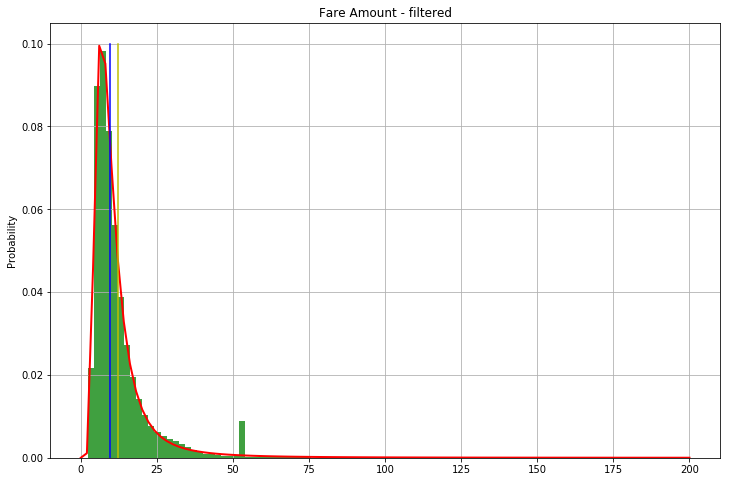

In [10]:
fare = getCleanFareData(fare)
fa = np.array(fare.fare_amount)
plt.hist(fa, bins=100, normed=True, facecolor='green', alpha=0.75)
plt.ylabel('Probability')
plt.title('Fare Amount - filtered')
plt.grid(True)

median_fare = np.median(fa)
mean_fare = np.mean(fa)
params = stats.alpha.fit(fa)
arg = params[:-2]
loc = params[-2]
scale = params[-1]
print(params)
x_plot = np.linspace(0, 200, 100)
plt.plot(x_plot, stats.alpha.pdf(x_plot, loc=loc, scale=scale, *arg), 'r-', lw=2)
plt.plot([median_fare,median_fare], [0, 0.1], 'b')
plt.plot([mean_fare,mean_fare], [0, 0.1], 'y')
print("Mean = {}; Median = {}".format(mean_fare,median_fare))
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 8)


/Users/vlaskial/anaconda2/envs/base36/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2306: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


(2.5183133454783793, -3.3589794371939181, 36.532154314263892)
Total amount Mean = 14.682349085338798; Median = 11.0


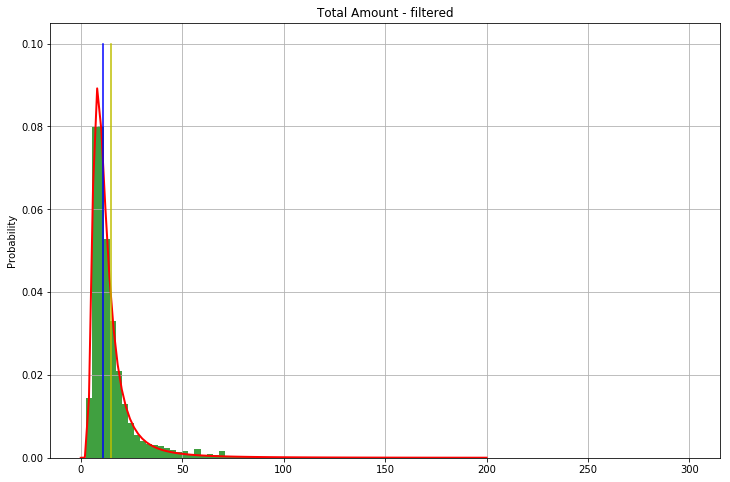

In [11]:
ta = np.array(fare.total_amount)
plt.hist(ta, bins=100, normed=True, facecolor='green', alpha=0.75)
plt.ylabel('Probability')
plt.title('Total Amount - filtered')
plt.grid(True)

median_total = np.median(ta)
mean_total = np.mean(ta)
params = stats.alpha.fit(ta)
arg = params[:-2]
loc = params[-2]
scale = params[-1]
print(params)
x_plot = np.linspace(0, 200, 100)
plt.plot(x_plot, stats.alpha.pdf(x_plot, loc=loc, scale=scale, *arg), 'r-', lw=2)
plt.plot([median_total, median_total], [0, 0.1], 'b')
plt.plot([mean_total,mean_total], [0, 0.1], 'y')
print("Total amount Mean = {}; Median = {}".format(mean_total, median_total))
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 8)

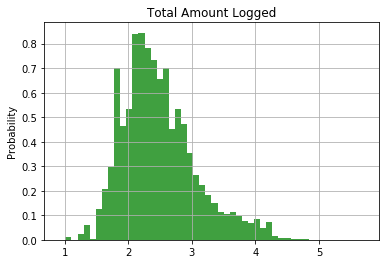

In [15]:
total_amount_log = np.log(ta)
plt.hist(total_amount_log, bins=50, normed=True, facecolor='green', alpha=0.75)
plt.ylabel('Probability')
plt.title('Total Amount Logged')
plt.grid(True)

In [86]:
#It would be interesting to see how continuous variables correlated
#For that we need merged data
#I merged all the data based on medallion, hack_license and pickup_datetime. 
#I beleive their combination gives us unique trip. There was 1304 duplicates which I removed from both data bases.
#Using fucntion from file cleanData.py - getHashedData and mergeHashedData
#Here I will just load sample of merged data:
merged = getTripData('./data/loc_hash_3_trip_4_2013.csv')
merged = getCleanTripData(merged)
merged = getCleanFareData(merged)
merged.head()

,Unnamed: 0,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,...,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,id.1,pick_locid,drop_locid
0,4,205A696DF62AD03C88DA8C5EC5248639,579C41EA5EC846F8B641A42F9EE3E855,CMT,1,N,2013-04-04 20:12:57,2013-04-04 20:29:55,1,1017,...,CRD,15.0,0.5,0.5,3.20,0.0,19.20,205A696DF62AD03C88DA8C5EC5248639579C41EA5EC846...,246,141
1,38,9827CDDA5D85B9C70A29ACE3824B644C,2BF23762F9D01A0723FE1B35996597C3,CMT,1,N,2013-04-04 14:39:58,2013-04-04 14:49:11,1,552,...,CRD,9.0,0.0,0.5,1.90,0.0,11.40,9827CDDA5D85B9C70A29ACE3824B644C2BF23762F9D01A...,239,48
2,144,5BAA424F00F10358D10A8DCBBEDFDC27,91953611F278BD5D2B44C0FF82F45E1C,CMT,1,N,2013-04-04 07:37:50,2013-04-04 08:03:18,1,1528,...,CRD,28.5,0.0,0.5,2.00,0.0,31.00,5BAA424F00F10358D10A8DCBBEDFDC2791953611F278BD...,237,231
3,156,49B8CFC71F0ED39C7B3F68F603DB9D05,5735FE2E3DC1CE2FC5DDA20579E1FD18,VTS,1,NaN,2013-04-12 23:29:00,2013-04-12 23:43:00,1,840,...,CRD,15.0,0.5,0.5,3.10,0.0,19.10,49B8CFC71F0ED39C7B3F68F603DB9D055735FE2E3DC1CE...,161,7
4,178,AFE81C8DACF7151CBB3B2F4838883A8E,AF876139D0E7D99BE4F90FD49921559F,VTS,1,NaN,2013-04-12 23:39:00,2013-04-12 23:46:00,1,420,...,CRD,7.0,0.5,0.5,1.88,0.0,9.88,AFE81C8DACF7151CBB3B2F4838883A8EAF876139D0E7D9...,68,249


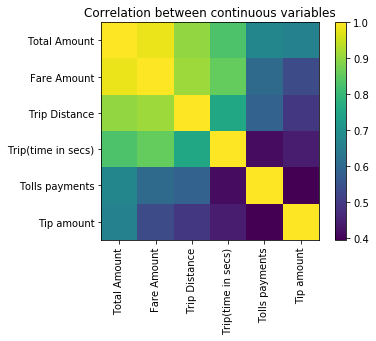

In [106]:
continuous_variables=['total_amount','fare_amount','trip_distance','trip_time_in_secs','tolls_amount','tip_amount']
var_titles=['Total Amount','Fare Amount','Trip Distance','Trip(time in secs)','Tolls payments','Tip amount']
cor_mat = merged[continuous_variables].corr()
plt.imshow(cor_mat)
plt.xticks(range(len(continuous_variables)),var_titles,rotation='vertical')
plt.yticks(range(len(continuous_variables)),var_titles)
plt.colorbar()
plt.title('Correlation between continuous variables')
plt.show()

/Users/vlaskial/anaconda2/envs/base36/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2306: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


(2.6905631527275071, -1.0275573505392248, 7.9259683352298236)


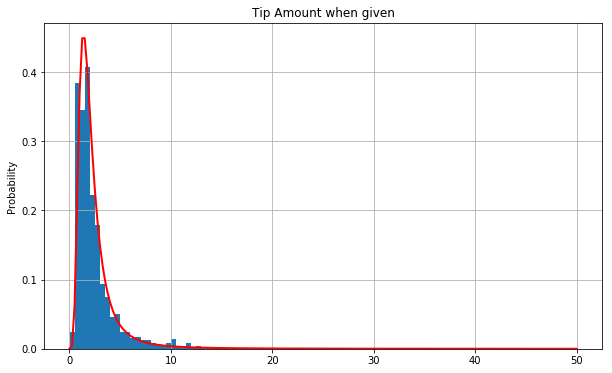

In [127]:
tip_amount_filter = ((merged.tip_amount >= 0.0) & (merged.tip_amount <= 50.0))
merged = merged[tip_amount_filter]
merged['tip_given'] = 1*(merged['tip_amount'] > 0.0)
merged['is_card_payment'] = 1*(merged['payment_type'] == 'CRD')
tip_amount = np.array(merged.tip_amount[merged.tip_given == 1])
#tip_amount = np.array(merged.tip_amount)
fig,ax = plt.subplots(1,1,figsize = [10,6])
plt.hist(tip_amount, bins=100, normed=True)
plt.ylabel('Probability')
plt.title('Tip Amount when given')
plt.grid(True)
params = stats.alpha.fit(tip_amount)
arg = params[:-2]
loc = params[-2]
scale = params[-1]
print(params)
x_plot = np.linspace(0, 50, 200)
plt.plot(x_plot, stats.alpha.pdf(x_plot, loc=loc, scale=scale, *arg), 'r-', lw=2)


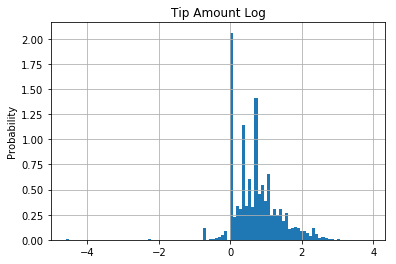

In [129]:
tip_amount = np.log(tip_amount)
plt.hist(tip_amount, bins=100, normed=True)
plt.ylabel('Probability')
plt.title('Tip Amount Log')
plt.grid(True)

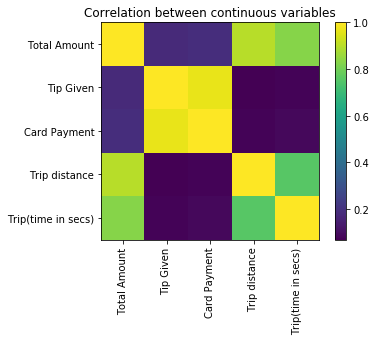

In [108]:
#I would like to check a hypotises of tips given mostly tips are given from card payments
merged['is_card_payment'] = 1*(merged['payment_type'] == 'CRD')
continuous_variables=['total_amount','tip_given','is_card_payment', 'trip_distance', 'trip_time_in_secs']
var_titles=['Total Amount','Tip Given','Card Payment','Trip distance','Trip(time in secs)']
cor_mat = merged[continuous_variables].corr()
plt.imshow(cor_mat)
plt.xticks(range(len(continuous_variables)),var_titles,rotation='vertical')
plt.yticks(range(len(continuous_variables)),var_titles)
plt.colorbar()
plt.title('Correlation between continuous variables')
plt.show()

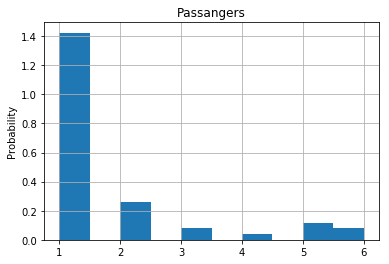

In [73]:
#Lets check passengers number and type of payment
passenger_count = np.array(trip.passenger_count)
plt.hist(passenger_count, normed=True)
plt.ylabel('Probability')
plt.title('Passangers per trip')
plt.grid(True)


75387
74613
0.9897329778343746


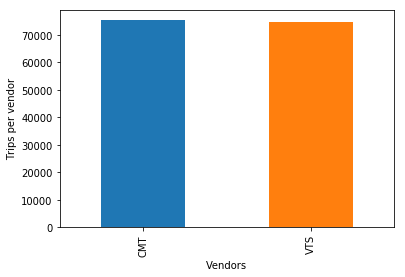

In [80]:
plot_vendors = trip.groupby(['vendor_id']).size().plot(kind='bar')
plot_vendors.set_xlabel('Vendors')
plot_vendors.set_ylabel('Trips per vendor')
plot_vendors.tick_params()
cmt = trip[trip.vendor_id == 'CMT']
vts = trip[trip.vendor_id == 'VTS']
print(len(cmt.vendor_id))
print(len(vts.vendor_id))
print(len(vts.vendor_id) / len(cmt.vendor_id))

0
80586
68922
0.8552602188965825


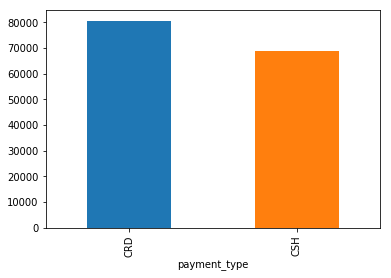

In [81]:
plot_payment_type = fare.groupby(['payment_type']).size().plot(kind='bar')
noc = fare[fare.payment_type == 'NOC']
crd = fare[fare.payment_type == 'CRD']
csh = fare[fare.payment_type == 'CSH']
print(len(noc.payment_type))
print(len(crd.payment_type))
print(len(csh.payment_type))
print(len(csh.payment_type) / len(crd.payment_type) )

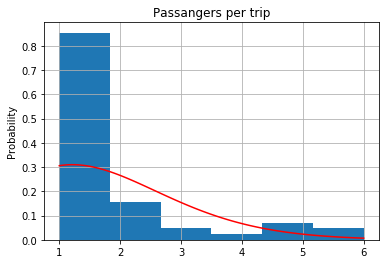

In [83]:
def poisson_dist(k, l):
    return (l**k/factorial(k)) * np.exp(-l)
(values, bins, patches) = plt.hist(passenger_count,bins=6, normed=True)
parameters, cov_matrix = scipy.optimize.curve_fit(poisson_dist, bins[1:], values) 
x = np.linspace(1, 6, 100)
plt.ylabel('Probability')
plt.title('Passangers per trip')
plt.grid(True)
plt.plot(x, poisson_dist(x, parameters), 'r-')
plt.show()

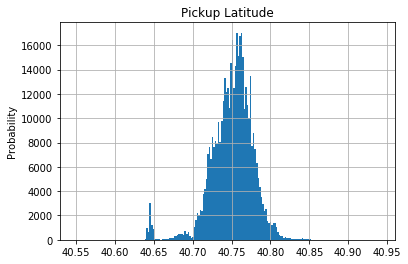

In [139]:
plat = np.array(merged['pickup_latitude'])
plt.hist(plat, bins=200)
plt.grid(True)
plt.ylabel('Probability')
plt.title('Pickup Latitude')
plt.show()

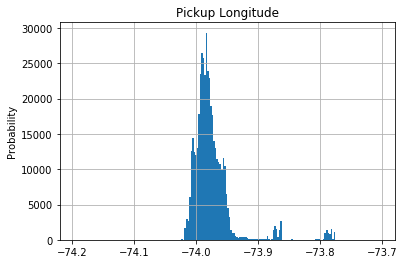

In [138]:
plong = np.array(merged['pickup_longitude'])
plt.hist(plong, bins=200)
plt.grid(True)
plt.ylabel('Probability')
plt.title('Pickup Longitude')
plt.show()

In [ ]:
# This is how to get locations plotted on the map
# p=pickups.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude',color='green',xlim=(long_min,long_max),ylim=(lat_min, lat_max),s=.02,alpha=.6)
# p.set_facecolor('black') #Background Color
# fig = matplotlib.pyplot.gcf()
# fig.set_size_inches(19, 19)

# d=dropoffs.plot(kind='scatter', x='dropoff_longitude', y='dropoff_latitude',color='red',xlim=(long_min,long_max),ylim=(lat_min, lat_max),s=.02,alpha=.6)
# d.set_facecolor('black') #Background Color
# fig = matplotlib.pyplot.gcf()
# fig.set_size_inches(19, 19)